In [ ]:
import pandas as pd
import numpy as np


In [ ]:
dat = pd.read_csv("C:/Users/LG/Desktop/2019_1인가구.csv", encoding='cp949') ; dat

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,2,1,0,0,0,0,1,1,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,201900,2,1,3,2,0,0,0,1,2,...,3333,316357,37697,0,0,110160,0,142500,26000,1
2,201900,3,2,1,0,0,0,0,1,1,...,0,9206,0,0,4050,3728,0,0,1429,1
3,201900,4,1,3,2,0,0,1,0,2,...,0,445731,71766,0,245393,104001,4857,7143,12571,1
4,201900,5,1,1,1,0,0,0,1,1,...,525514,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,201900,9506,2,4,2,0,0,1,0,2,...,0,1538751,95328,0,8370,142911,1075742,55000,161400,0
9506,201900,9507,2,4,3,0,0,1,0,2,...,0,685210,8298,0,0,47612,422300,181000,26000,0
9507,201900,9508,2,5,3,0,0,1,0,3,...,0,1459269,96528,0,174473,72436,304014,640909,170909,0
9508,201900,9509,1,1,1,0,0,0,1,1,...,454545,117633,24609,0,0,26887,0,65227,909,0


In [ ]:
## [데이터 필요한 행만 전처리]

dat.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',
    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',
    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',
    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_가족소비관광서비스이용금액': '오락문화_가족소비관광서비스이용',
    '가계지출_소비지출_오락문화_기타오락문화서비스이용금액': '오락문화_기타오락문화서비스이용',
    '가계지출_소비지출_오락문화_영화공연관람비': '오락문화_영화공연관람',
    '가계지출_소비지출_오락문화_음반영상물구입비': '오락문화_음반영상물구입',
    '가계지출_소비지출_오락문화_여행운동관련서비스이용금액': '오락문화_여행운동관련서비스이용',
    '가계지출_소비지출_오락문화_숙박관련서비스이용금액': '오락문화_숙박관련서비스이용',
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_교육비상품서비스이용금액': '교육_교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스구입비': '교육_교과서비스구입',
    '가계지출_소비지출_교육_기타교육비상품서비스이용금액': '교육_기타교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스외서구입비': '교육_교과서비스외서구입',
    '가계지출_소비지출_교육_외국어서적구입비': '교육_외국어서적구입',
    '가계지출_소비지출_교육_기타서적구입비': '교육_기타서적구입',
    '가계지출_소비지출_교육_전자교과서비스이용금액': '교육_전자교과서비스이용',
    '가계지출_소비지출_교육_기타교육서비스이용금액': '교육_기타교육서비스이용',
    '가계지출_소비지출_교육_직업훈련서비스이용금액': '교육_직업훈련서비스이용',
    '가계지출_소비지출_교육_취미서비스이용금액': '교육_취미서비스이용',
    '가계지출_소비지출_교육_미술학원서비스이용금액': '교육_미술학원서비스이용',
    '가계지출_소비지출_교육_음악학원서비스이용금액': '교육_음악학원서비스이용',
    '가계지출_소비지출_교육_기타교육학원서비스이용금액': '교육_기타교육학원서비스이용',
    '가계지출_소비지출_교육_기타교육관련서비스이용금액': '교육_기타교육관련서비스이용',
    '가계지출_소비지출_음식외식비': '음식외식비',
    '가계지출_소비지출_음식외식_외식음식비': '외식음식비',
    '가계지출_소비지출_음식외식_휴게음식비': '휴게음식비',
    '가계지출_소비지출_음식외식_음식재료비': '음식재료비',
    '가계지출_소비지출_음식외식_간식비': '간식비',
    '가계지출_소비지출_음식외식_식음료조제서비스이용금액': '식음료조제서비스이용',
    '가계지출_소비지출_음식외식_식음료종합소매업이용금액': '식음료종합소매업이용',
    '가계지출_소비지출_음식외식_농수산물구입비': '농수산물구입',
    '가계지출_소비지출_음식외식_식음료종합소매업이용비': '식음료종합소매업이용',
    '가계지출_소비지출_기타상품서비스이용금액': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비': '기타서비스금액구입',
    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '비경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금'
}, inplace=True)

dat.rename(columns={
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비',
    '교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',
    '기타상품서비스이용': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '기타서비스금액구입': '기타서비스금액구입',
    '비소비지출금액': '비소비지출금액',
    '비경상조세': '비경상조세',
    '연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
}, inplace=True)


In [ ]:
# 행 전처리

dat = dat[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


성별 분석 (전체, 1인, 기타서비스)

In [ ]:
dat['가구주_성별코드'] = dat['가구주_성별코드'].replace({1: '남', 2: '여'}) # 1은 남성, 2는 여성
dat['가구주_성별코드']

0       F
1       M
2       M
3       M
4       F
       ..
9505    M
9506    M
9507    M
9508    M
9509    M
Name: 가구주_성별코드, Length: 9492, dtype: object

In [ ]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return None  # 10대는 None으로 처리하여 제외
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    else:
        return '70대 이상'

# 데이터 연령대별 구분
dat.loc[:, '연령대'] = dat['가구주_연령'].apply(age)
dat = dat.dropna()  # None 값을 가진 행 제외
dat.연령대


0          60대
1          60대
2          50대
3          20대
4          50대
         ...  
9505       30대
9506       50대
9507       60대
9508       60대
9509    70대 이상
Name: 연령대, Length: 9492, dtype: object

##### 전체가구 지출 (total_expend) | 1인가구 지출 (single_expend )

전체가구 소비지출

box plot 그려서 분포 확인해봐야 함

In [ ]:
total_expend = dat['소비지출']

total_expend.info # 전체가구 소비지출

<bound method Series.info of 0        451464
1       1468101
2       1358773
3       1166942
4       5875488
         ...   
9505    3133653
9506    2995655
9507    5863909
9508    1788251
9509    1102741
Name: 소비지출, Length: 9492, dtype: int64>

### 연령대별 소비분포

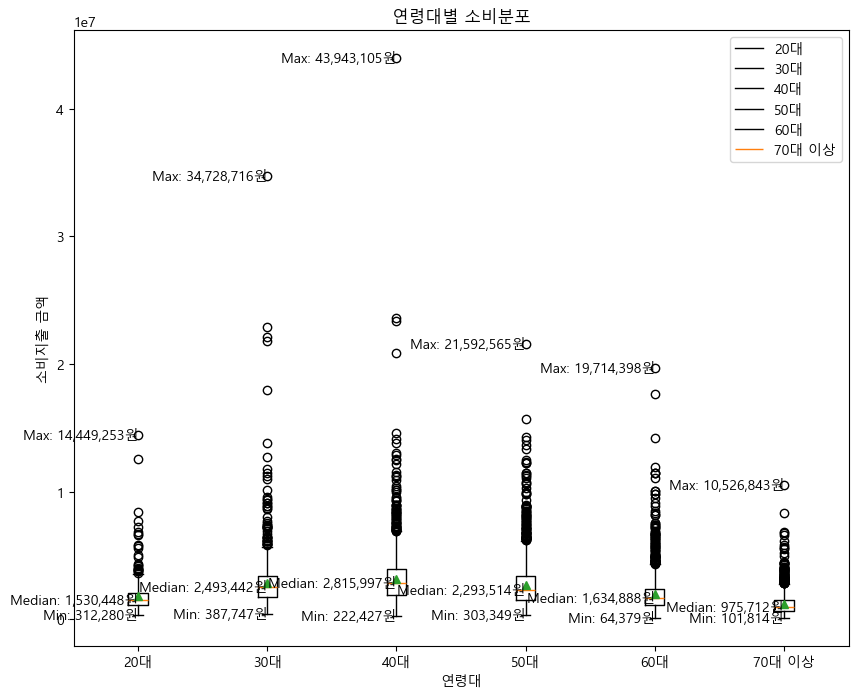

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

# 연령대별 소비 분포를 박스플롯으로 그리는 함수
def age_expend(dat, 연령대, total_expend):

    # 연령대별로 데이터를 그룹화
    age_groups = dat.groupby(연령대)[total_expend]

    # 박스플롯 그리기
    plt.figure(figsize=(10, 8))
    for age_group, values in age_groups:
        plt.boxplot(values, positions=[list(age_groups.groups.keys()).index(age_group) + 1], showmeans=True)

    # 각 연령대별 통계량 표시
    for age_group, values in age_groups:
        plt.text(list(age_groups.groups.keys()).index(age_group) + 1, values.median(), f'Median: {values.median():,.0f}원', verticalalignment='center', horizontalalignment='right')
        plt.text(list(age_groups.groups.keys()).index(age_group) + 1, values.max(), f'Max: {values.max():,.0f}원', verticalalignment='center', horizontalalignment='right')
        plt.text(list(age_groups.groups.keys()).index(age_group) + 1, values.min(), f'Min: {values.min():,.0f}원', verticalalignment='center', horizontalalignment='right')

    plt.title('연령대별 소비분포')
    plt.xlabel('연령대')
    plt.ylabel('소비지출 금액')
    plt.xticks(range(1, len(age_groups.groups.keys()) + 1), age_groups.groups.keys())
    plt.legend(age_groups.groups.keys())
    plt.show()

# 함수 호출하여 박스플롯 그리기
age_expend(dat, '연령대', '소비지출')



- 이상치 품목확인 : 어떤 항목에서 많은 지출이 일어나는지 확인
- 이상치 제거 후 그리기

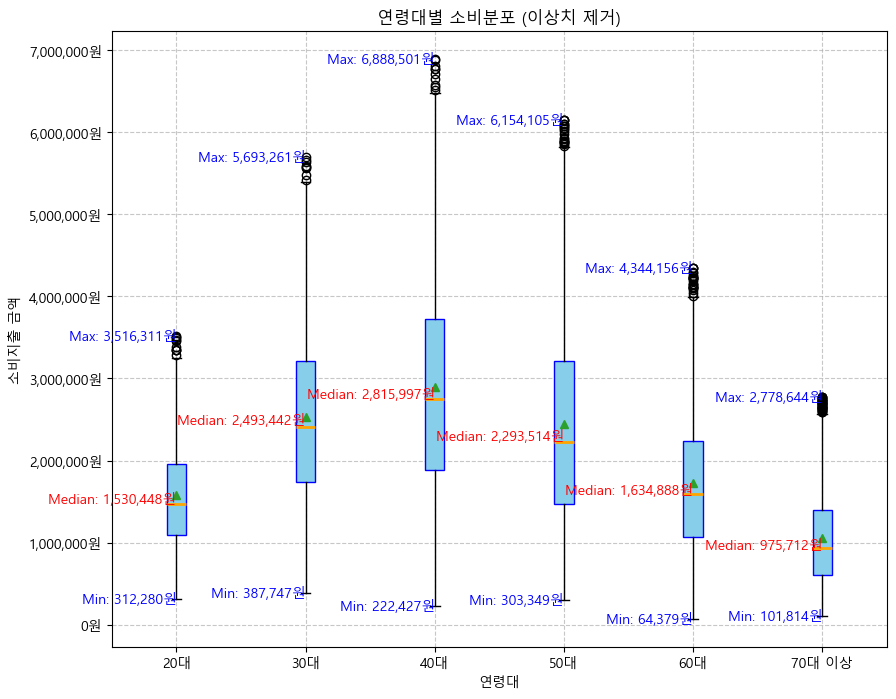

In [ ]:
import numpy as np

def age_expend_outliers(dat, 연령대, total_expend):
    # 연령대별로 데이터를 그룹화
    age_groups = dat.groupby(연령대)[total_expend]

    # 이상치를 제외한 데이터를 담을 리스트
    dat_outliers = []

    # 이상치 제거 함수
    def outliers(values):
        Q1 = np.percentile(values, 25)
        Q3 = np.percentile(values, 75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        return values[(values >= lower_limit) & (values <= upper_limit)]

    # 박스플롯 그리기
    plt.figure(figsize=(10, 8))
    for age_group, values in age_groups:
        values_outliers = outliers(values)
        dat_outliers.append(values_outliers)
        plt.boxplot(values_outliers, positions=[list(age_groups.groups.keys()).index(age_group) + 1], showmeans=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), medianprops=dict(color='orange', linewidth=2))

    # 각 연령대별 통계량 표시
    for age_group, values in age_groups:
        median = values.median()
        values_outliers = outliers(values)
        plt.text(list(age_groups.groups.keys()).index(age_group) + 1, median, f'Median: {median:,.0f}원', verticalalignment='center', horizontalalignment='right', color='red')
        plt.text(list(age_groups.groups.keys()).index(age_group) + 1, values_outliers.max(), f'Max: {values_outliers.max():,.0f}원', verticalalignment='center', horizontalalignment='right', color='blue')
        plt.text(list(age_groups.groups.keys()).index(age_group) + 1, values_outliers.min(), f'Min: {values_outliers.min():,.0f}원', verticalalignment='center', horizontalalignment='right', color='blue')

    plt.title('연령대별 소비분포 (이상치 제거)')
    plt.xlabel('연령대')
    plt.ylabel('소비지출 금액')
    plt.xticks(range(1, len(age_groups.groups.keys()) + 1), age_groups.groups.keys())
    plt.yticks(np.arange(0, max([max(dat) for dat in dat_outliers]) + 1000000, 1000000), [f'{i:,.0f}원' for i in np.arange(0, max([max(dat) for dat in dat_outliers]) + 1000000, 1000000)])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 함수 호출하여 박스플롯 그리기 (이상치 제거)
age_expend_outliers(dat, '연령대', '소비지출')



--2차 전처리--

* 전체가구 소비지출 이상치확인 (9,510개중 6,730개) <2,780개 이상치 식별>

In [ ]:
# cleaned_total_expend = ((total_expend >= lower_limit) & (total_expend <= upper_limit))
# total_expend[cleaned_total_expend]

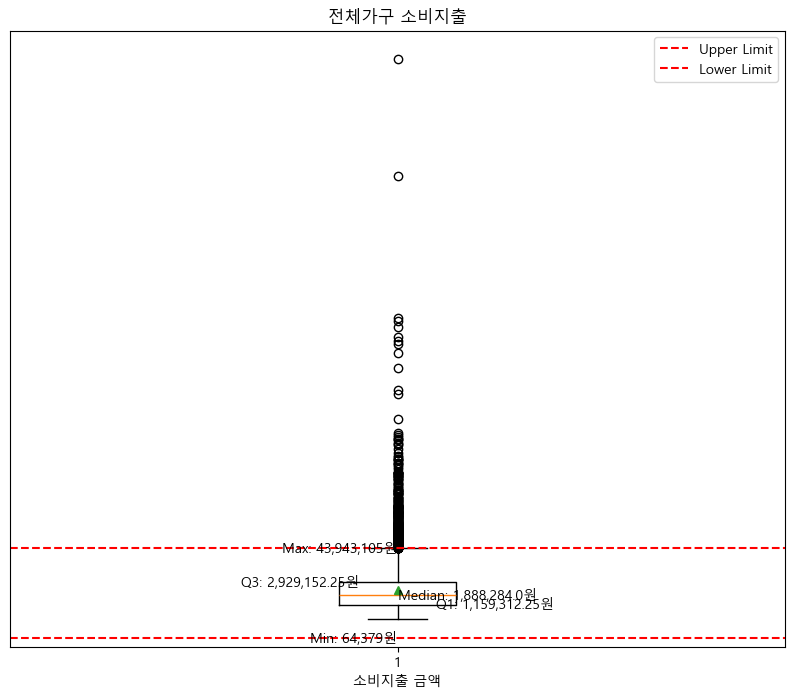

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(total_expend, 25)
Q3 = np.percentile(total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(total_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")


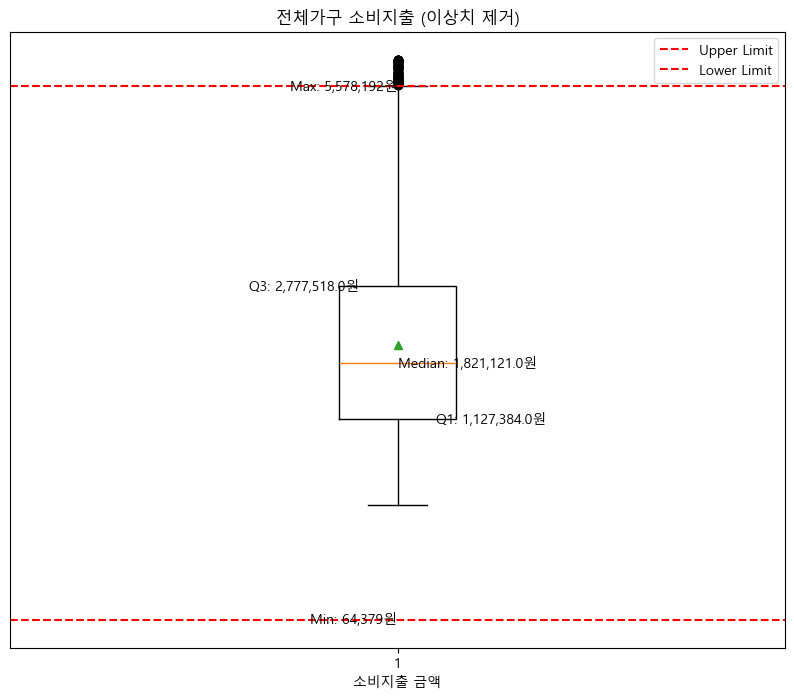

In [ ]:
# 이상치 제거
cleaned_total_expend = total_expend[(total_expend >= lower_limit) & (total_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_total_expend, 25)
Q3 = np.percentile(cleaned_total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')
plt.text(1, np.median(cleaned_total_expend), f'Median: {np.median(cleaned_total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right')
plt.text(1, upper_limit, f'Max: {np.max(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right')

plt.title('전체가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [ ]:
# 전체가구 평균 소비지출
total_expend_mean = int(total_expend.mean())
print(f"전체가구의 평균 소비지출: {total_expend_mean:,}원")

전체가구의 평균 소비지출: 2,296,707원


In [ ]:
# 1인가구 이상치 식별
# (single_expend < lower_limit) & (single_expend > upper_limit)

1인가구 소비지출

In [ ]:
# 가구원수 1로 설정하여 9510개에서 2827개의 데이터 전처리

single_expend = dat.loc[dat['가구원수'] == 1, '소비지출']

single_expend.info # 1인가구 소비지출

<bound method Series.info of 0        451464
2       1358773
4       5875488
5       1180308
12       637191
         ...   
9499    2933981
9500    1009745
9501    1292380
9504     694386
9508    1788251
Name: 소비지출, Length: 2810, dtype: int64>

-- 2차전처리 --

* 1인가구 소비지출 이상치확인 (2827개중 2665개) <162개 이상치 식별>

In [ ]:
#cleaned_single_expend = ((single_expend >= lower_limit) & (single_expend <= upper_limit))
#single_expend[cleaned_single_expend]

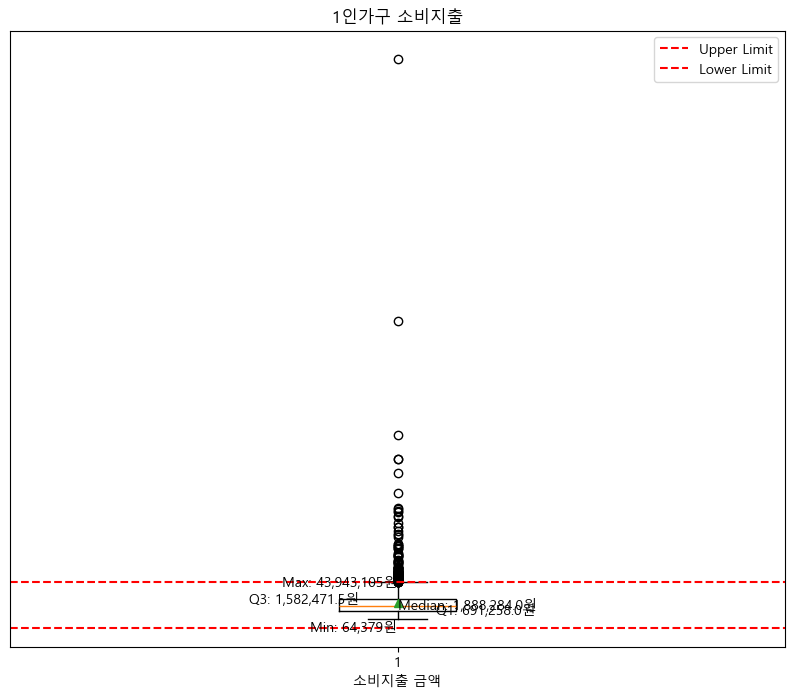

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(single_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(single_expend, 25)
Q3 = np.percentile(single_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(single_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(single_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(single_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('1인가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")


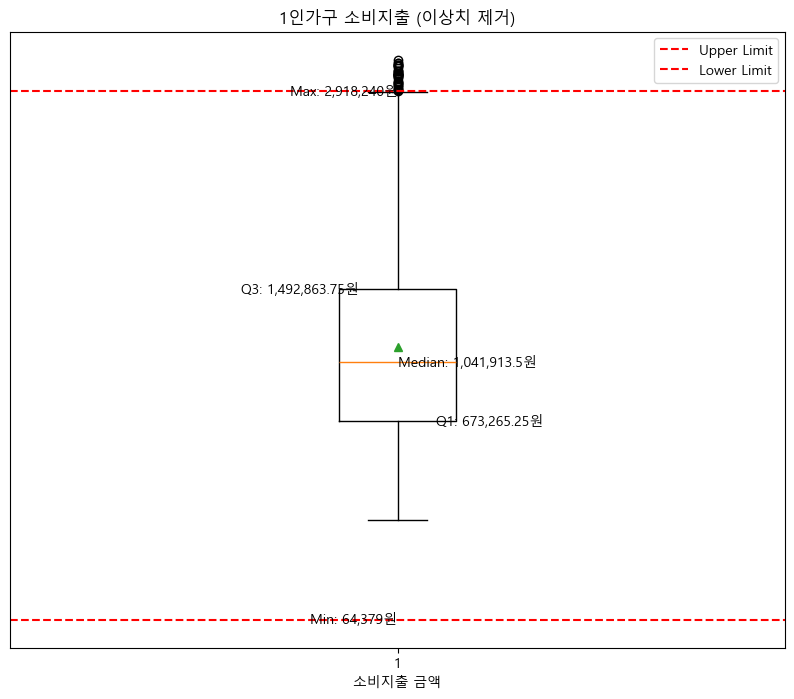

In [ ]:
# 이상치 제거
cleaned_single_expend = single_expend[(single_expend >= lower_limit) & (single_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_single_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_single_expend, 25)
Q3 = np.percentile(cleaned_single_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')
plt.text(1, np.median(cleaned_single_expend), f'Median: {np.median(cleaned_single_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_single_expend):,}원', verticalalignment='center', horizontalalignment='right')
plt.text(1, upper_limit, f'Max: {np.max(cleaned_single_expend):,}원', verticalalignment='center', horizontalalignment='right')

plt.title('1인가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [ ]:
# 1인가구 평균 소비지출
single_expend_mean = int(single_expend.mean())
print('-' * 50)
print(f"1인가구의 평균 소비지출: {single_expend_mean:,}원")

--------------------------------------------------
1인가구의 평균 소비지출: 1,308,667원


전체가구 기타상품서비스 평균소비 비용, 비율

In [ ]:
tot_other_service = dat['기타상품서비스이용']
tot_other_service_mean = int(tot_other_service.mean())
tot_other_service_per = (tot_other_service_mean / total_expend_mean) * 100  # 전체가구 소비 중 기타상품서비스 소비 비율

print(tot_other_service)
print(tot_other_service_mean)
print(tot_other_service_per)

0        57652
1       224028
2        22133
3       116307
4       888656
         ...  
9505    223745
9506    132191
9507    854536
9508    522120
9509     42878
Name: 기타상품서비스이용, Length: 9492, dtype: int64
198304
8.63427507296316


1인가구 기타상품서비스 평균소비 비용, 비율

In [ ]:
sin_other_service = dat.loc[dat['가구원수'] == 1, '기타상품서비스이용']
sin_other_service_mean = int(sin_other_service.mean())
sin_other_service_per = (sin_other_service_mean / single_expend_mean) * 100  # 1인가구 소비 중 기타상품서비스 소비 비율

print(sin_other_service)
print(sin_other_service_mean)
print(sin_other_service_per)

0        57652
2        22133
4       888656
5        19775
12       23150
         ...  
9499    319171
9500    161594
9501    130867
9504     29908
9508    522120
Name: 기타상품서비스이용, Length: 2810, dtype: int64
104567
7.990344373320332


In [ ]:
print(f"전체가구 소비 중 기타상품*서비스 소비지출, 비율: {tot_other_service_mean:,}원 ({tot_other_service_per:.2f}%)")
print(f"1인가구 소비 중 기타상품*서비스 소비지출, 비율: {sin_other_service_mean:,}원 ({sin_other_service_per:.2f}%)")

전체가구 소비 중 기타상품*서비스 소비지출, 비율: 198,304원 (8.63%)
1인가구 소비 중 기타상품*서비스 소비지출, 비율: 104,567원 (7.99%)


10대는 18명으로 나와서 제외시켜도 될듯

In [ ]:
# 연령대별 가구원 수 분포
dat.groupby('연령대')['가구원수'].value_counts().unstack().fillna(0).astype(int)

가구원수,1,2,3,4,5,6,7,8
연령대,,,,,,,,
20대,389,80,39,9,1,2,0,0
30대,286,219,291,290,56,5,1,0
40대,284,298,431,570,144,21,3,0
50대,474,776,570,323,53,8,0,1
60대,550,982,318,70,16,6,0,0
70대 이상,827,954,115,22,7,1,0,0


In [ ]:
# 연령대별 소득구간코드 분포 분석
income_by_age_group = dat.groupby('연령대')['소득구간코드'].value_counts().unstack().fillna(0).astype(int)
income_by_age_group

소득구간코드,1,2,3,4,5,6,7,8
연령대,,,,,,,,
20대,88,105,153,90,38,24,12,10
30대,37,60,181,248,201,165,92,164
40대,56,104,243,276,252,236,183,401
50대,137,237,299,306,273,269,205,479
60대,231,387,363,302,228,161,91,179
70대 이상,714,637,277,123,93,37,15,30


<Figure size 1000x600 with 0 Axes>

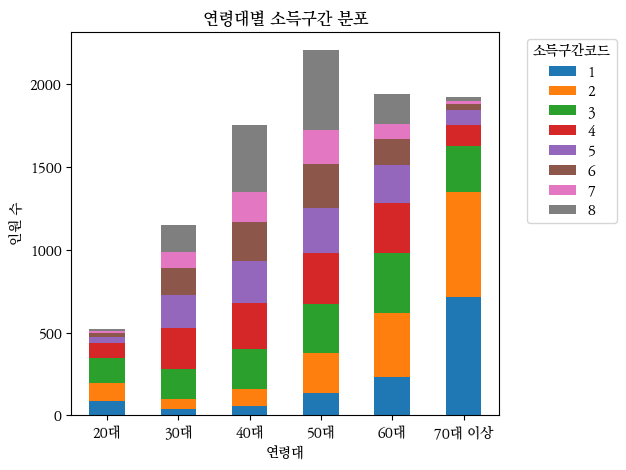

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings
import pandas as pd

# 나눔글꼴 경로 설정
font_path = 'C:/Windows/Fonts/KoPubBatangMedium.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

# 시각화 설정
plt.figure(figsize=(10, 6))

# 각 연령대별 소득구간 합산 계산
income_by_age_group_sum = income_by_age_group.sum(axis=1)

# 연령대별 소득구간 비율 계산
income_by_age_group_ratio = income_by_age_group.div(income_by_age_group_sum, axis=0)

# 각 연령대별로 막대 그래프 그리기
income = income_by_age_group.plot(kind='bar', stacked=True)

# 그래프 제목 및 축 레이블 설정 (한글 폰트 적용)
plt.title('연령대별 소득구간 분포')
plt.xlabel('연령대')
plt.ylabel('인원 수')

# x축 레이블 1로 설정하여 출력
plt.xticks(rotation=1)

# 범례 표시
plt.legend(title='소득구간코드', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

## 에러문구 없애기
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.8f}'.format

평균? 소비금액? 이것도 연령대별 분포봐야함

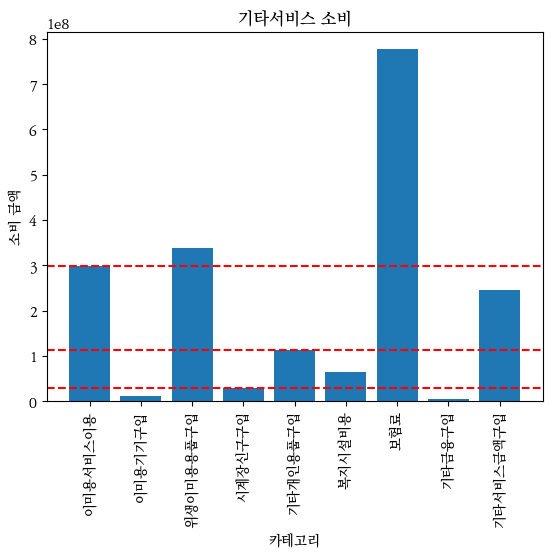

In [ ]:
import matplotlib.pyplot as plt

# '기타'로 묶인 항목들의 소비 데이터 추출
기타소비 = dat[['이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입',
             '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입']]

# 카테고리 별 소비 합계 계산
기타소비_소비합계 = 기타소비.sum()

# 데이터를 정렬하여 분위수 계산
sort_dat = np.sort(기타소비_소비합계.values)
quartile = np.percentile(sort_dat, [25, 50, 75])  # 4분위수 계산

# 바 그래프 그리기
plt.bar(기타소비_소비합계.index, 기타소비_소비합계.values)
plt.title('기타서비스 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

# 사분위수 기준 선 그리기
for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')

plt.show()


보험료를 제외한 뒤 그래프 그려보기

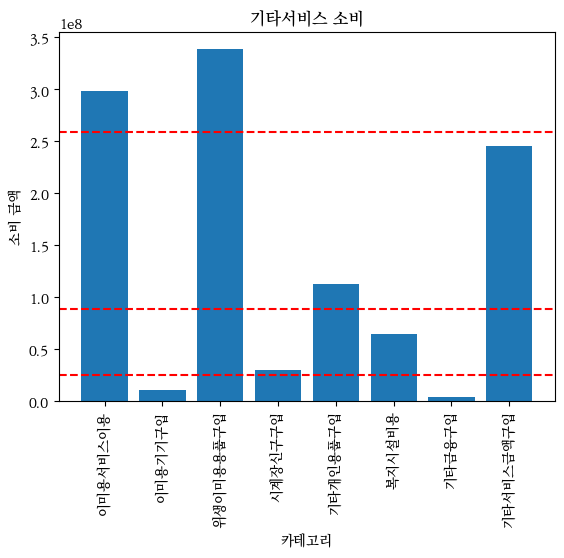

In [ ]:
import matplotlib.pyplot as plt

# '기타'로 묶인 항목들의 소비 데이터 추출
기타소비 = dat[['이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입',
             '기타개인용품구입', '복지시설비용', '기타금융구입', '기타서비스금액구입']]

# 카테고리 별 소비 합계 계산
기타소비_소비합계 = 기타소비.sum()

# 데이터를 정렬하여 분위수 계산
sort_dat = np.sort(기타소비_소비합계.values)
quartile = np.percentile(sort_dat, [25, 50, 75])  # 4분위수 계산

# 바 그래프 그리기
plt.bar(기타소비_소비합계.index, 기타소비_소비합계.values)
plt.title('기타서비스 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

# 사분위수 기준 선 그리기
for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')

plt.show()

In [ ]:
# 기타 서비스 평균 소비 추출

기타평균소비 = dat.agg({
    '이미용서비스이용': lambda x: f"{int(x.mean()):,}원",
    '이미용기기구입': lambda x: f"{int(x.mean()):,}원",
    '위생이미용용품구입': lambda x: f"{int(x.mean()):,}원",
    '시계장신구구입': lambda x: f"{int(x.mean()):,}원",
    '기타개인용품구입': lambda x: f"{int(x.mean()):,}원",
    '복지시설비용': lambda x: f"{int(x.mean()):,}원",
    '보험료': lambda x: f"{int(x.mean()):,}원",
    '기타금융구입': lambda x: f"{int(x.mean()):,}원",
    '기타서비스금액구입': lambda x: f"{int(x.mean()):,}원"
})
print(기타평균소비)

이미용서비스이용     31,478원
이미용기기구입       1,174원
위생이미용용품구입    35,672원
시계장신구구입       3,189원
기타개인용품구입     11,910원
복지시설비용        6,819원
보험료          81,779원
기타금융구입          443원
기타서비스금액구입    25,836원
dtype: object


In [ ]:
# 기타 서비스 평균 소비 추출

연령대별_기타평균소비 = dat.groupby('연령대').agg({
    '이미용서비스이용': lambda x: f"{int(x.mean()):,}원",
    '이미용기기구입': lambda x: f"{int(x.mean()):,}원",
    '위생이미용용품구입': lambda x: f"{int(x.mean()):,}원",
    '시계장신구구입': lambda x: f"{int(x.mean()):,}원",
    '기타개인용품구입': lambda x: f"{int(x.mean()):,}원",
    '복지시설비용': lambda x: f"{int(x.mean()):,}원",
    '보험료': lambda x: f"{int(x.mean()):,}원",
    '기타금융구입': lambda x: f"{int(x.mean()):,}원",
    '기타서비스금액구입': lambda x: f"{int(x.mean()):,}원"
})
print(연령대별_기타평균소비)



       이미용서비스이용 이미용기기구입 위생이미용용품구입 시계장신구구입 기타개인용품구입   복지시설비용       보험료 기타금융구입  \
연령대                                                                            
20대     21,506원  1,446원   40,597원  5,745원  17,747원   1,859원   26,242원   509원   
30대     31,405원  2,398원   53,078원  6,612원  25,242원  21,001원   88,389원   928원   
40대     35,051원  1,792원   47,499원  5,467원  14,475원   7,065원  112,359원   464원   
50대     38,364원  1,410원   43,133원  3,022원  13,392원   4,168원  118,344원   680원   
60대     32,362원    565원   26,606원  1,348원   8,239원   5,187원   83,157원   163원   
70대 이상  22,191원    150원   13,815원    437원   2,061원   4,161원   21,777원   128원   

       기타서비스금액구입  
연령대               
20대      14,569원  
30대      39,958원  
40대      20,983원  
50대      30,599원  
60대      31,997원  
70대 이상   13,207원  


In [ ]:
# 연령대별 기타평균소비

연령대별_기타평균소비 = dat.groupby('연령대').agg({
    '이미용서비스이용': lambda x: f"{int(x.mean()):,}원",
    '이미용기기구입': lambda x: f"{int(x.mean()):,}원",
    '위생이미용용품구입': lambda x: f"{int(x.mean()):,}원",
    '시계장신구구입': lambda x: f"{int(x.mean()):,}원",
    '기타개인용품구입': lambda x: f"{int(x.mean()):,}원",
    '복지시설비용': lambda x: f"{int(x.mean()):,}원",
    '보험료': lambda x: f"{int(x.mean()):,}원",
    '기타금융구입': lambda x: f"{int(x.mean()):,}원",
    '기타서비스금액구입': lambda x: f"{int(x.mean()):,}원"
})
print(연령대별_기타평균소비)


       이미용서비스이용 이미용기기구입 위생이미용용품구입 시계장신구구입 기타개인용품구입   복지시설비용       보험료 기타금융구입  \
연령대                                                                            
20대     21,506원  1,446원   40,597원  5,745원  17,747원   1,859원   26,242원   509원   
30대     31,405원  2,398원   53,078원  6,612원  25,242원  21,001원   88,389원   928원   
40대     35,051원  1,792원   47,499원  5,467원  14,475원   7,065원  112,359원   464원   
50대     38,364원  1,410원   43,133원  3,022원  13,392원   4,168원  118,344원   680원   
60대     32,362원    565원   26,606원  1,348원   8,239원   5,187원   83,157원   163원   
70대 이상  22,191원    150원   13,815원    437원   2,061원   4,161원   21,777원   128원   

       기타서비스금액구입  
연령대               
20대      14,569원  
30대      39,958원  
40대      20,983원  
50대      30,599원  
60대      31,997원  
70대 이상   13,207원  


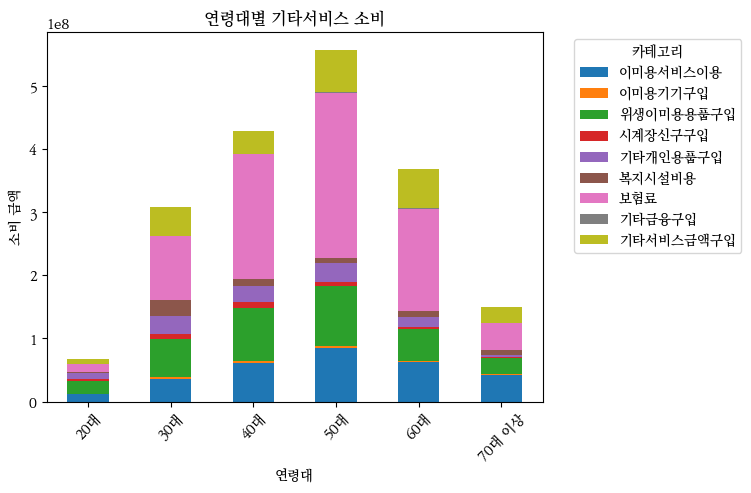

In [ ]:
# 연령대별로 기타 서비스 소비 추출
연령대별_기타소비 = dat.groupby('연령대')[['이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입',
                                 '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입']].sum()

# 바 그래프 그리기
연령대별_기타소비.plot(kind='bar', stacked=True)
plt.title('연령대별 기타서비스 소비')
plt.xlabel('연령대')
plt.ylabel('소비 금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


보험료를 제외한 뒤 그래프 그려보기

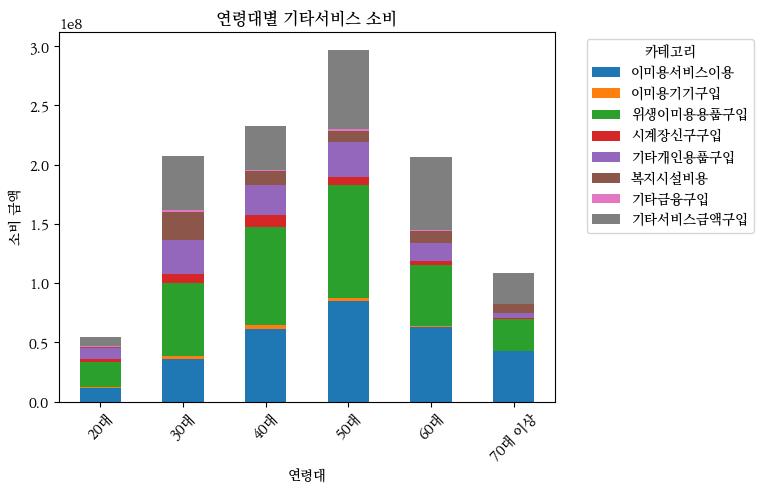

In [ ]:
# 연령대별로 기타 서비스 소비 추출
연령대별_기타소비_ = dat.groupby('연령대')[['이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입',
                                 '기타개인용품구입', '복지시설비용', '기타금융구입', '기타서비스금액구입']].sum()

# 바 그래프 그리기
연령대별_기타소비_.plot(kind='bar', stacked=True)
plt.title('연령대별 기타서비스 소비')
plt.xlabel('연령대')
plt.ylabel('소비 금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

평균기타소비로 설정해야함


In [ ]:
# 각 연령대별로 소비가 높은 순서대로 품목 출력

for 연령대, 소비품목 in 연령대별_기타소비.iterrows():
    # 소비가 높은 순으로 정렬
    sort_data = 소비품목.sort_values(ascending=False)
    print(f"{연령대}의 기타소비 순위:")
    for 순위, (품목, 금액) in enumerate(sort_data.items(), start=1):
        print(f"{순위}. {품목}: {금액:,}원")
    print()


20대의 기타소비 순위:
1. 위생이미용용품구입: 21,110,936원
2. 보험료: 13,646,290원
3. 이미용서비스이용: 11,183,492원
4. 기타개인용품구입: 9,228,699원
5. 기타서비스금액구입: 7,576,291원
6. 시계장신구구입: 2,987,833원
7. 복지시설비용: 967,119원
8. 이미용기기구입: 752,082원
9. 기타금융구입: 264,781원

30대의 기타소비 순위:
1. 보험료: 101,470,981원
2. 위생이미용용품구입: 60,933,945원
3. 기타서비스금액구입: 45,872,051원
4. 이미용서비스이용: 36,053,444원
5. 기타개인용품구입: 28,978,341원
6. 복지시설비용: 24,109,998원
7. 시계장신구구입: 7,591,558원
8. 이미용기기구입: 2,753,817원
9. 기타금융구입: 1,066,173원

40대의 기타소비 순위:
1. 보험료: 196,742,058원
2. 위생이미용용품구입: 83,171,625원
3. 이미용서비스이용: 61,374,970원
4. 기타서비스금액구입: 36,742,027원
5. 기타개인용품구입: 25,346,028원
6. 복지시설비용: 12,370,844원
7. 시계장신구구입: 9,573,007원
8. 이미용기기구입: 3,139,198원
9. 기타금융구입: 814,166원

50대의 기타소비 순위:
1. 보험료: 260,950,358원
2. 위생이미용용품구입: 95,110,353원
3. 이미용서비스이용: 84,594,818원
4. 기타서비스금액구입: 67,470,866원
5. 기타개인용품구입: 29,530,355원
6. 복지시설비용: 9,191,345원
7. 시계장신구구입: 6,664,614원
8. 이미용기기구입: 3,110,393원
9. 기타금융구입: 1,501,356원

60대의 기타소비 순위:
1. 보험료: 161,492,830원
2. 이미용서비스이용: 62,847,741원
3. 기타서비스금액구입: 62,138,248원
4. 위생이미용용품구

분석 해야할 것 :
- 1인가구 연령대별 어떤 항목에서 어떤품목을 소비하는 성향이있는지 (ex:기타서비스에서 보험료)
- 연별 추이 확인 (코로나 이전,후)
- 취업여부에 따른 결과 확인 (로지스틱 회귀분석 진행)
- 성별로 구분하여 데이터 확인

- 상관분석
- 장바구니 분석(연관성 분석) 지지도 (A와 B를 동시에 구매할 확률) / 신뢰도 (신뢰도는 A를 구매한 후 B를 또 구매할지에 대한 조건부 확률) / 향상도 (향상도는 A를 구매할 경우 B를 구매할 확률이 얼마나 높아지는지를 나타냅니다.)

https://intl.finebi.com/ko-KR/blog/Basket-Analysis-ko

선형회귀분석 모델링